0. Load the `penguins` dataset from the `palmerpenguins` library, as well as any other libraries you need.



In [3]:
%pip install palmerpenguins
import numpy as np
import pandas as pd
from sys import exit
from palmerpenguins import load_penguins
from plotnine import ggplot, aes, geom_point, geom_bar

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


1. Write a function that takes in information about a penguin, and returns one of the following definitions:

*   "Big Mouth Billy": Male penguins with bill length times bill depth greater than 800.
*   "Dainty Daisy": Female penguins with flipper length less than 5% of body mass.
*   "Average Adelie:" Any Adelie penguins that do not fall into either category.
*   "Other": Any penguins that do not fall into any of the categories.



In [18]:
#take a look at load_pengiuns data for context
pen = load_penguins()

def penClass(pen):
#create new variables for the conditions on Big Mouth Billy and Dainty Daisy.
    bill_len_dep = pen['bill_length_mm'] * pen['bill_depth_mm']
    five_per_body_mass = pen['body_mass_g'] * 0.05
    
    if pen['sex'] == 'male' and bill_len_dep > 800:
        return 'Big Mouth Billy'
    
    elif pen['sex'] == 'female' and pen['flipper_length_mm'] < five_per_body_mass:
        return 'Dainty Daisy'
    
    elif pen['species'] == 'Adelie':
        return 'Average Adelie'
    
    else:
        return 'Other'

2. Use an iterable function to create a new variable called `category_name` that adds these labels.

In [19]:
pen['category_name'] = pen.apply(penClass, axis=1)
print(pen)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex  year    category_name
0       Adelie  Torgersen            39.1           18.7              181.0       3750.0    male  2007   Average Adelie
1       Adelie  Torgersen            39.5           17.4              186.0       3800.0  female  2007     Dainty Daisy
2       Adelie  Torgersen            40.3           18.0              195.0       3250.0  female  2007   Average Adelie
3       Adelie  Torgersen             NaN            NaN                NaN          NaN     NaN  2007   Average Adelie
4       Adelie  Torgersen            36.7           19.3              193.0       3450.0  female  2007   Average Adelie
..         ...        ...             ...            ...                ...          ...     ...   ...              ...
339  Chinstrap      Dream            55.8           19.8              207.0       4000.0    male  2009  Big Mouth Billy
340  Chinstrap      Dream            43.

3. Run the following code to find the counts for each type.

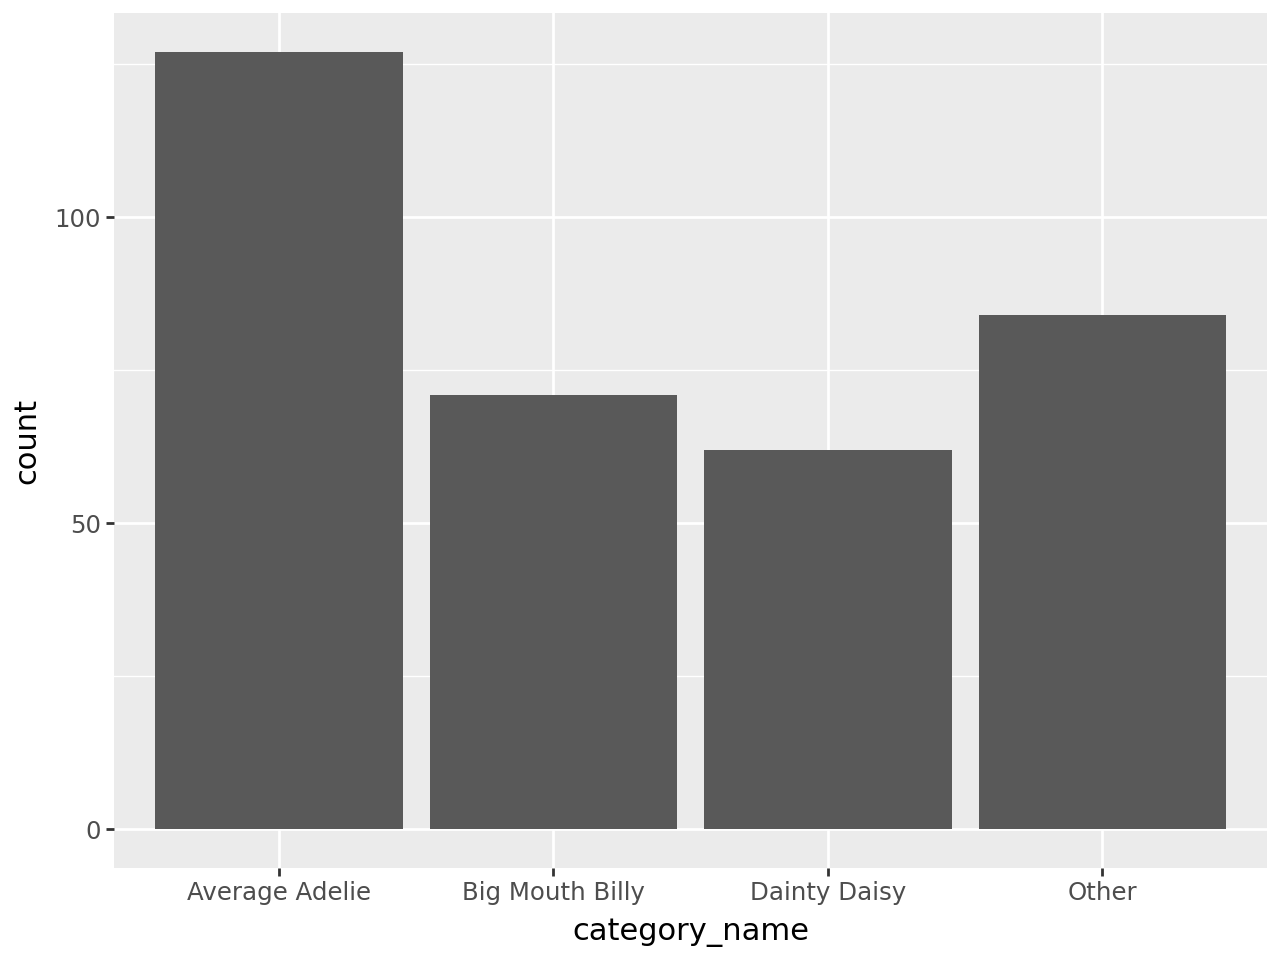

In [24]:
def plot(cat_var):
  
  plot = (ggplot(pen, aes(x = cat_var)) + geom_bar())
  
  return plot
  
  
plot('category_name')

In [20]:
pen.value_counts("category_name")

category_name
Average Adelie     127
Other               84
Big Mouth Billy     71
Dainty Daisy        62
Name: count, dtype: int64